In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

In [226]:
df=pd.read_csv('customer_segmentation.csv')

In [227]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [229]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [230]:
df.dropna(subset='Income',inplace=True)

In [231]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

- Removed Null items

# UniVariate Analysis

## Year Birth Column

In [232]:
count=df['Year_Birth'].describe()

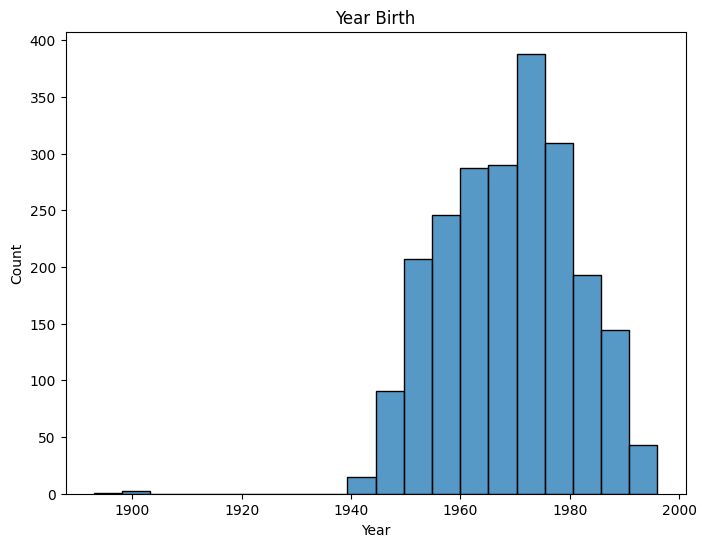

In [233]:
plt.figure(figsize=(8, 6))
sns.histplot(x=df['Year_Birth'],bins=20)
plt.xlabel('Year')
plt.title("Year Birth")
plt.ylabel('Count')
plt.show()

- The Customer born in 1900 most probably are outliers because it can not be logically true

## Education Colummn

In [234]:
counts=df.Education.value_counts()
counts

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_1716\665873751.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index,y=counts.values,palette='viridis')


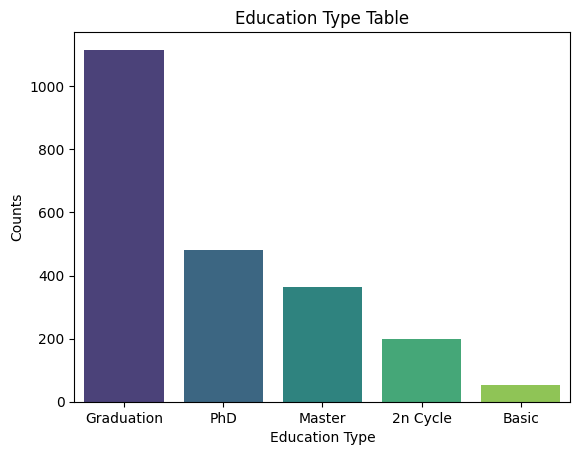

In [235]:
sns.barplot(x=counts.index,y=counts.values,palette='viridis')
plt.xlabel('Education Type')
plt.title('Education Type Table')
plt.ylabel('Counts')
plt.show()

- Most Customers Have Graduated

## Marital Status Column

In [236]:
counts=df['Marital_Status'].value_counts()
counts

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_1716\186888613.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


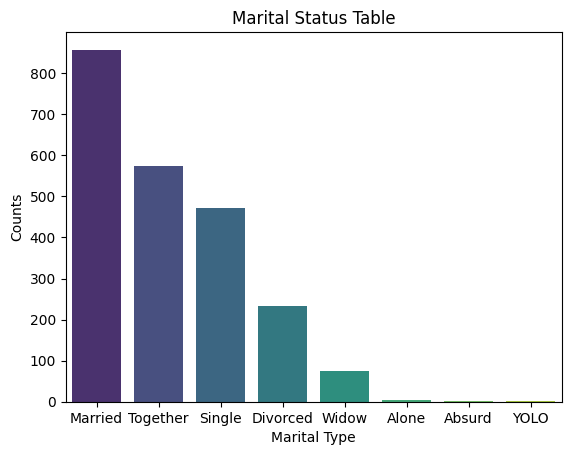

In [237]:
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.title('Marital Status Table')
plt.xlabel('Marital Type')
plt.ylabel('Counts')
plt.show()

- Most Customers are Married

## Income Column

In [238]:
df.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

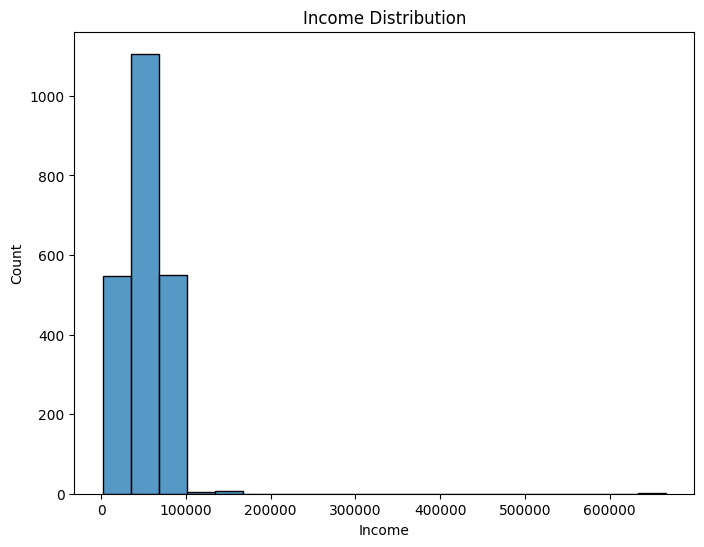

In [239]:
plt.figure(figsize=(8, 6))
sns.histplot(x=df['Income'],bins=20)
plt.xlabel('Income')
plt.title("Income Distribution")
plt.ylabel('Count')
plt.show()


- Most Incomes are average together but more than 600000 may be outlier so it can be a manager

## KidHome Column

In [240]:
count=df.Kidhome.value_counts()
count

Kidhome
0    1283
1     887
2      46
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_1716\408831228.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, palette='viridis')


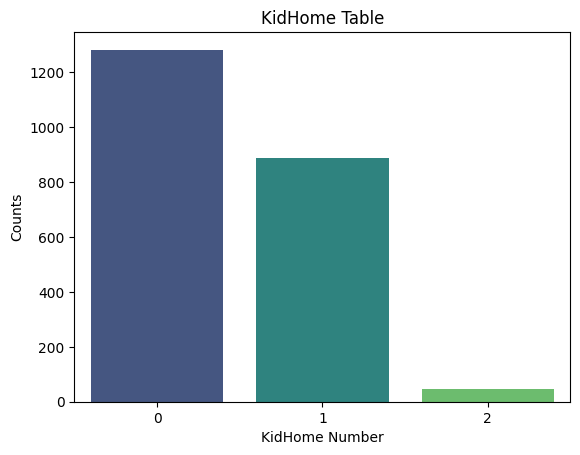

In [241]:
sns.barplot(x=count.index, y=count.values, palette='viridis')
plt.title('KidHome Table')
plt.xlabel('KidHome Number')
plt.ylabel('Counts')
plt.show()

- Most Customer have 0 Kids home and not many have 1 kid at home and so low have 2 kids at home

## TeenHome Column

In [242]:
counts=df.Teenhome.value_counts()
counts

Teenhome
0    1147
1    1018
2      51
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_1716\272711046.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


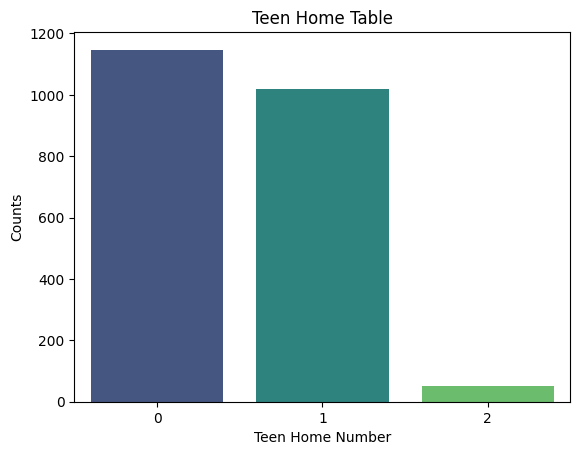

In [243]:
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.title('Teen Home Table')
plt.xlabel('Teen Home Number')
plt.ylabel('Counts')
plt.show()

- Most have 0 or 1 Teen Home Numbers

## Dt_Customer Column 

In [244]:
df['year_column'] = df['Dt_Customer'].apply(lambda x: '20' + x[-2:])

- To remove the months and day and leave the year only

In [245]:
counts=df['year_column'].value_counts()
counts

year_column
2013    1173
2014     553
2012     490
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_1716\1689890867.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


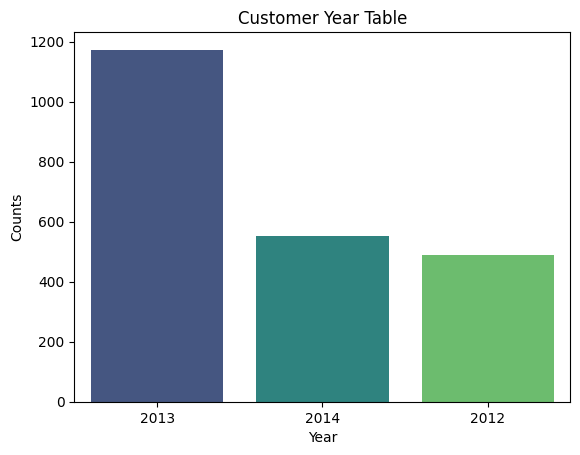

In [246]:
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.title('Customer Year Table')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.show()

- Most Customers Have has been included in the Database in 2013 and 2014 and 2012 are close with each other

## Recency Column

In [247]:
df.Recency.describe()

count    2216.000000
mean       49.012635
std        28.948352
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

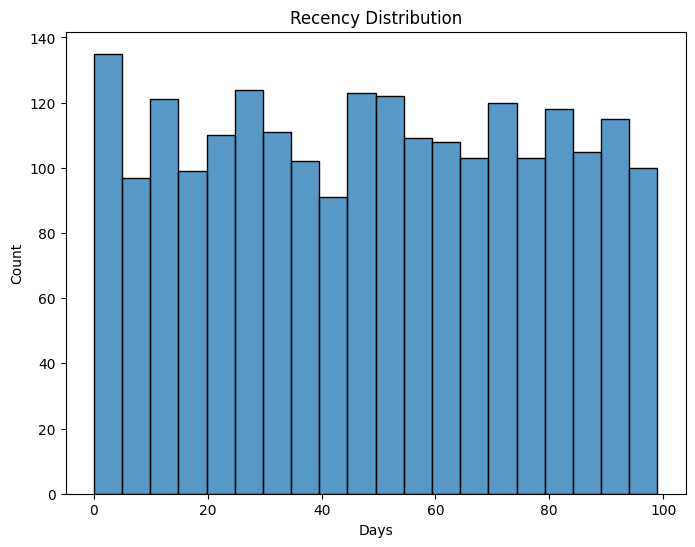

In [248]:
plt.figure(figsize=(8, 6))
sns.histplot(x=df['Recency'],bins=20)
plt.xlabel('Days')
plt.title("Recency Distribution")
plt.ylabel('Count')
plt.show()

## All Expenses Column

In [249]:
df['Expenses'] = df['MntWines'] + df['MntFruits']+df['MntMeatProducts']+ df['MntFishProducts']+df['MntSweetProducts']+ df['MntGoldProds']+ df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df['Expenses']

0       1642
1         33
2        797
3         61
4        441
        ... 
2235    1359
2236     466
2237    1260
2238     866
2239     183
Name: Expenses, Length: 2216, dtype: int64

In [250]:
df['Expenses'].describe()

count    2216.000000
mean      621.956227
std       608.723493
min         5.000000
25%        76.000000
50%       412.000000
75%      1071.000000
max      2553.000000
Name: Expenses, dtype: float64

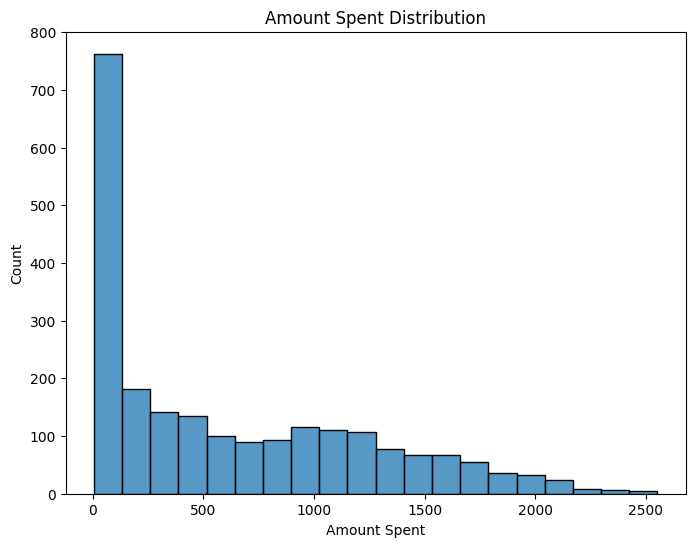

In [251]:
plt.figure(figsize=(8, 6))
sns.histplot(x=df['Expenses'],bins=20)
plt.xlabel('Amount Spent')
plt.title("Amount Spent Distribution")
plt.ylabel('Count')
plt.show()

## NumWebVisitsMonth Column

In [252]:
df.NumWebVisitsMonth.describe()

count    2216.000000
mean        5.319043
std         2.425359
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

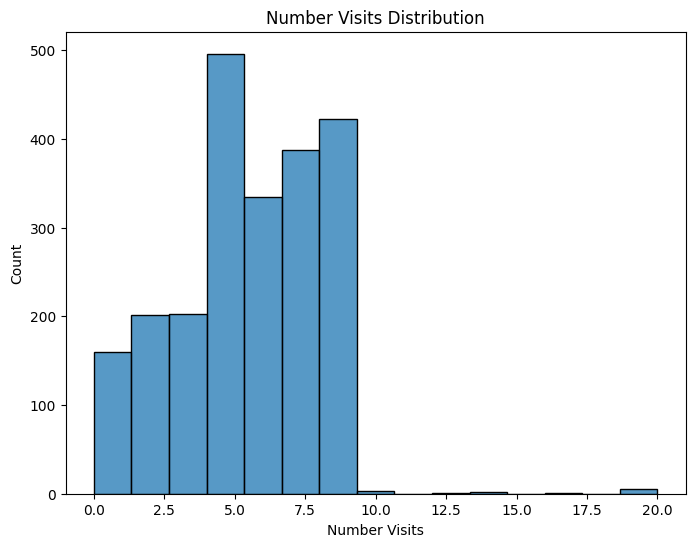

In [253]:
plt.figure(figsize=(8, 6))
sns.histplot(x=df['NumWebVisitsMonth'],bins=15)
plt.xlabel('Number Visits')
plt.title("Number Visits Distribution")
plt.ylabel('Count')
plt.show()

## Marketing Campaigns Columns

In [254]:
df['CombinedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].apply(lambda x: ','.join(map(str, x)), axis=1)

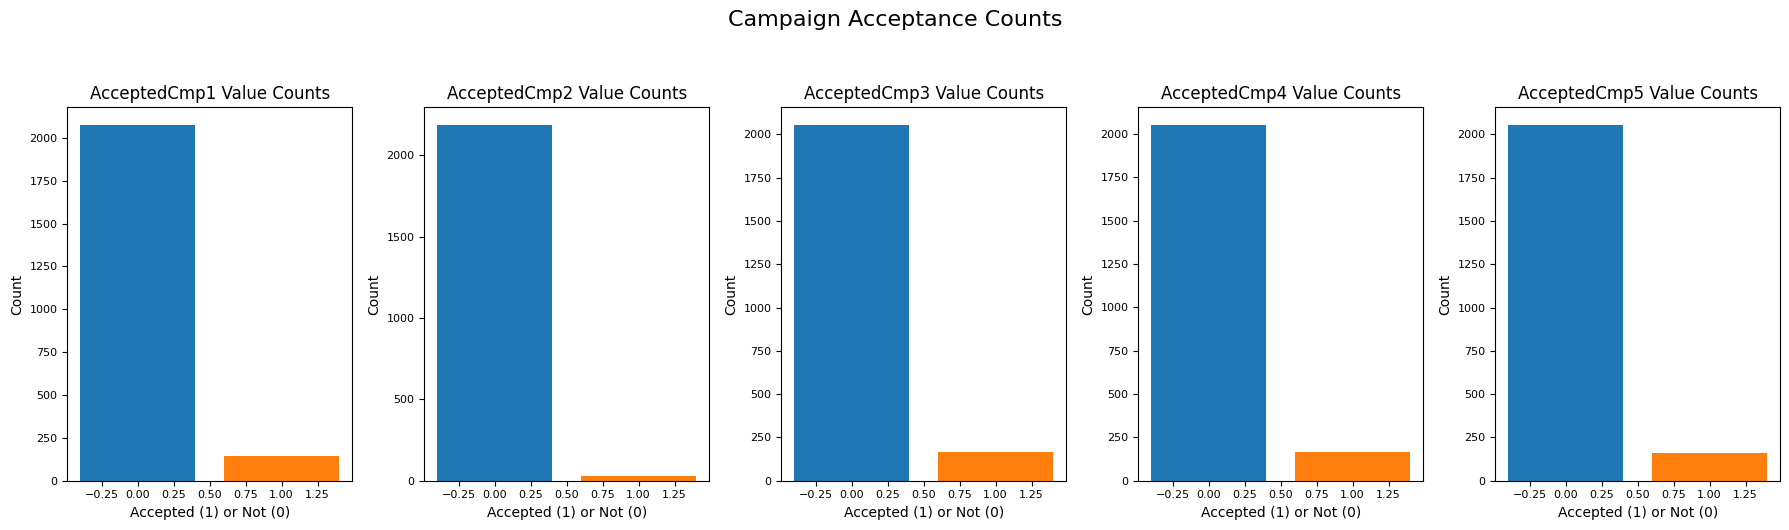

In [255]:
# Assuming df is your existing DataFrame
fig, axs = plt.subplots(1, 5, figsize=(18, 5))  # Adjust figsize as needed

# List of columns to plot
columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Loop through each column to plot value counts
for i, column in enumerate(columns):
    value_counts = df[column].value_counts()
    axs[i].bar(value_counts.index, value_counts.values, color=['#1f77b4', '#ff7f0e'])  # Custom colors
    axs[i].set_title(f'{column} Value Counts', fontsize=12)
    axs[i].set_xlabel('Accepted (1) or Not (0)', fontsize=10)
    axs[i].set_ylabel('Count', fontsize=10)
    axs[i].tick_params(axis='both', which='major', labelsize=8)  # Adjust tick size

# Add a common title for the whole figure
plt.suptitle('Campaign Acceptance Counts', fontsize=16, y=1.05)

plt.tight_layout()
plt.show()


- Most Customers Accepted The marketing Campaigns

## Complain Column

In [256]:
counts=df.Complain.value_counts()
counts

Complain
0    2195
1      21
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_1716\1571352323.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


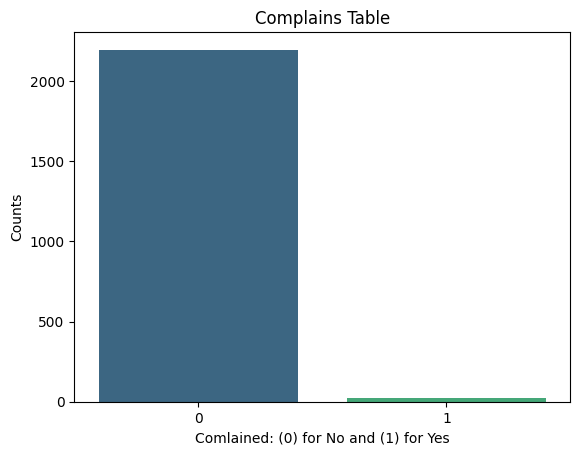

In [257]:
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.title('Complains Table')
plt.xlabel('Comlained: (0) for No and (1) for Yes')
plt.ylabel('Counts')
plt.show()

- Most Customers have not complained

## Z_CostContact Column

In [258]:
df.Z_CostContact.value_counts()

Z_CostContact
3    2216
Name: count, dtype: int64

- All contact cost is 3

## Z_Revenue Column

In [259]:
df.Z_Revenue.value_counts()

Z_Revenue
11    2216
Name: count, dtype: int64

- All Revenue is 11

## Response Column

In [260]:
counts=df.Response.value_counts()
counts

Response
0    1883
1     333
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_1716\1349107250.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


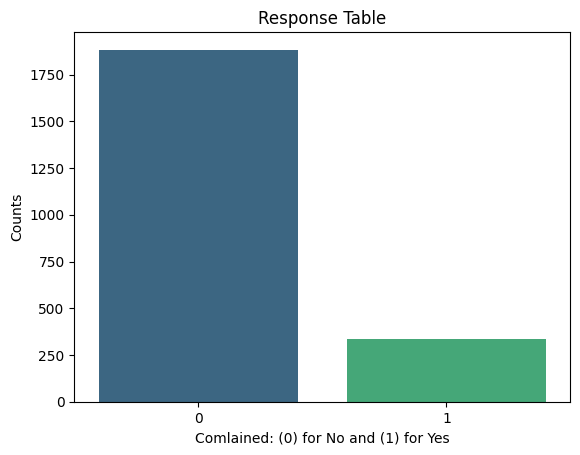

In [261]:
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.title('Response Table')
plt.xlabel('Comlained: (0) for No and (1) for Yes')
plt.ylabel('Counts')
plt.show()

- Most Have not Responded

# Machine Learning

## K-Means Model

### PreProcessing

In [262]:
df.drop(columns=['ID','Expenses','CombinedCmp'],inplace=True)

In [263]:
encoder=LabelEncoder()
df['Education']=encoder.fit_transform(df['Education'])
df['Marital_Status']=encoder.fit_transform(df['Marital_Status'])
df['Dt_Customer']=encoder.fit_transform(df['Dt_Customer'])

<Axes: >

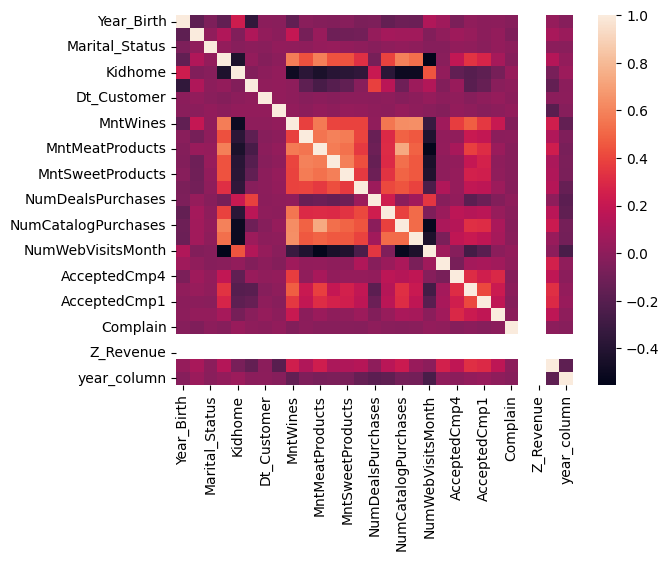

In [266]:
sns.heatmap(df.corr())

In [267]:
kmeans = KMeans(n_clusters=3, init='random')
kmeans.fit(df)


KMeans(init='random', n_clusters=3)

In [268]:
pred = kmeans.predict(df)
pred

array([1, 1, 2, ..., 1, 2, 1])

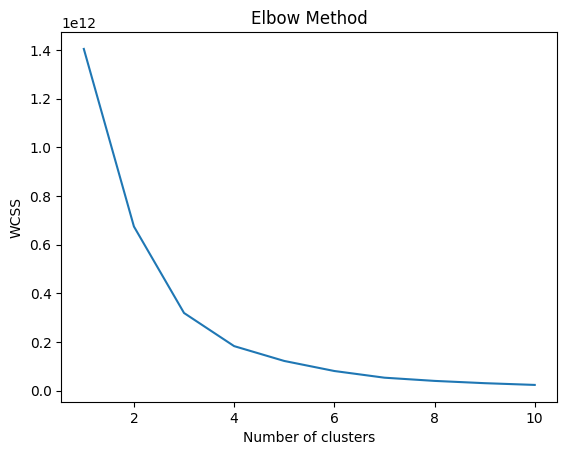

In [269]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

## Agglomerative Clustering

In [271]:
num_clusters = 2
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = agg_clustering.fit_predict(df)

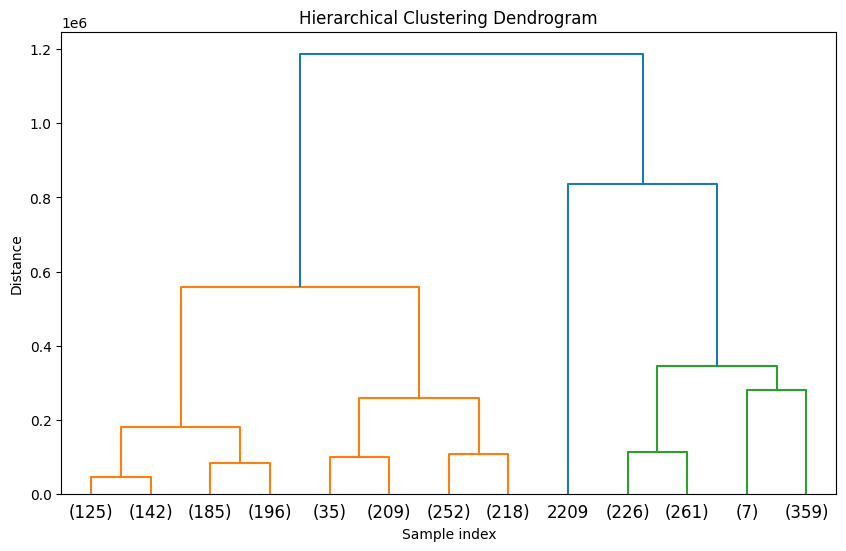

In [272]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
model.fit(df)
labels = model.labels_

# Compute linkage matrix
linkage_matrix = linkage(df, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.grid(False)
plt.show()